In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression # Biblioteca para criar algoritmo de Regressão Logistica
from sklearn.ensemble import RandomForestClassifier # Algoritmo de Random Forest
from sklearn.tree import DecisionTreeClassifier # Algoritmo de Arvore de Decisão

%matplotlib inline

In [2]:
# Lendo o dataset de treino
df = pd.read_csv('train.csv')

In [3]:
# Primeiras linhas do DataFrame
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Tamanho do dataset
df.shape

(614, 13)

In [5]:
# Gerando estatísticas de variáveis numéricas
df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [6]:
# Verificando como o Pandas está tratando as colunas
df.dtypes

Loan_ID               object
Gender               float64
Married               object
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# Agrupando dados pela coluna que queremos prever e ver quantos dados existem em cada coluna
df.groupby('Loan_Status').count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,,
N,192,192,192,192,192,192,192,192,181,192,179,192
Y,422,422,419,422,422,422,422,422,411,422,385,422


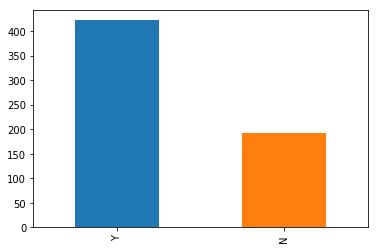

In [8]:
# Gerando visualizações para ver quantos dados temos em cada classe que queremos prever
df['Loan_Status'].value_counts().plot(kind='bar')
plt.show()

**Visualizar quantas linhas temos em cada coluna utilizando o código acima nos permitirá saber se temos um dataset balanceado, ou seja, quando temos uma quantidade semelhante de linha para cada classe de nosso DataFrame (Y e N, no caso)**

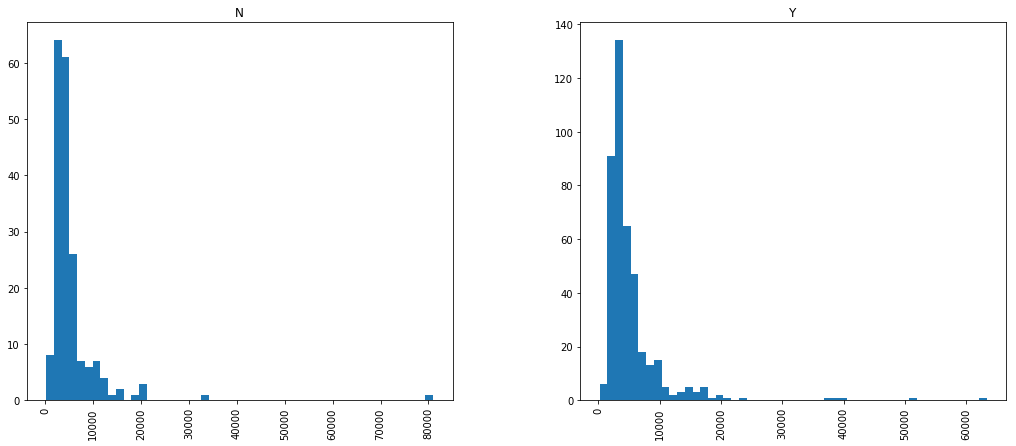

In [9]:
# O gráfico abaixo irá gerar um gráfico para cada uma das colunas e mostrará como está a distribuição
# de renda (Applicant Income) 
df[['Loan_Status','ApplicantIncome']].hist(by='Loan_Status', figsize=(17,7), bins=50)
plt.show()

**O gráfico acima nos mostra que, pelo menos, 80% das pessoas que pediram um empréstimo tem renda de até U$ 20 mil, independente se eles foram aprovados ou não.**

# Feature Engineering
Vamos trabalhar algumas *features* para que elas possam ser interpretadas por nosso modelo. Por exemplo, sabemos que modelos somente entendem **colunas numéricas**, e nós temos muitas colunas categóricas. Vamos transformá-las nas células abaixo.

In [10]:
# Renomeando colunas
df.columns = ['Loan_ID', 'is_Male', 'is_Married', 'Dependents', 'is_Graduated',
              'is_Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
              'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [11]:
# Vamos usar o map para que possamos alterar os valores de YES ou NO para binários
yes_no_map = {'Yes': 1, 'No': 0}
df['is_Married'] = df['is_Married'].map(yes_no_map)

In [12]:
# Vamos criar uma coluna que contém o Total de renda dos aplicante, 
# somando as colunas ApplicantIncome e CoapplicantIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [13]:
# Por fim, vamos mappear a coluna que queremos prever 
mapper_status = {'Y': 1,
                 'N': 0}
df['Loan_Status'] = df['Loan_Status'].map(mapper_status)

In [14]:
# Primeiras linhas do novo DataFrame
df.head()

,Loan_ID,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


# Data Cleaning
Existem muitas formas de lidar com dados nulos (*missing data*). Abaixo irei mostrar algumas técnicas que você pode utilizar. É interessante que, após treinar seu modelo pela primeira vez, você volte nessas fases e tente limpar seus dados de outras formas.

In [15]:
# Vamos ver quantos valores nulos tem em cada coluna
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
LoanAmount           22
is_Married            3
TotalIncome           0
Loan_Status           0
Property_Area         0
Loan_Amount_Term      0
CoapplicantIncome     0
ApplicantIncome       0
is_Self_Employed      0
is_Graduated          0
Dependents            0
is_Male               0
Loan_ID               0
dtype: int64

In [16]:
# A coluna is_Married possui apenas 3 valores nulos. Irei desconsiderar essas linhas.
# Vamos utilizar a função .loc para selecionar todas as linhas que não contém dados nulos na coluna is_Married
df = df.loc[df['is_Married'].notnull()]

In [17]:
# Também podemos preencher valores nulos com a média.
# Aqui, vamos preencher a coluna LoanAmount com a média
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [18]:
# De forma semelhante aos anteriores, vamos preencher o valor da coluna Credit_History
# com o valor mais frequente
df['Credit_History'].value_counts()

1.0    472
0.0     89
Name: Credit_History, dtype: int64

In [19]:
df['Credit_History'].fillna(1, inplace=True)

# Feature Selection
Feature Selection é o ato de você selecionar as melhores *features* do DataFrame para enviar para o modelo. Aqui essa fase será bem curta, onde apenas iremos remover a coluna `Loan_ID`, mas você pode sempre voltar nessa fase e **colocar e remover outras colunas para ver se seu modelo performa melhor**.

In [20]:
# Vamos remover a coluna Loan_ID
# A função .drop() fará isso. o argumento axis=1 informa que queremos remover a coluna inteira
# O argumento inplace=True evita que nós utilizemos o código df = df.drop(...)
# Ou seja, ele irá salvar a alteração direto no DataFrame
df.drop('Loan_ID', axis=1, inplace=True)

# One-hot Encoding
Existe uma técnica de codificação de feature chamada **One-hot Encoding**, que irá gerar uma coluna para cada valor distinto na coluna que você quer codificar.

Por exemplo, imagine que você tem uma coluna chamada **Color**, que possui três valores distintos: **Red** (Vermelho), **Yellow** (Amarelo) e **Green** (Verde). Se você aplica o **One-hot Encoding** na coluna **Color**, o Python irá gerar três novas colunas, chamadas: **is_Red**, **is_Yellow** e **is_Green**, e irá marcar com o valor `1` onde esse valor for compatível. A imagem abaixo exemplifica esse processo:

![](https://i.imgur.com/mtimFxh.png)

In [21]:
# Vamos aplicar o One-hot Encoding na coluna Property Area, que criará uma coluna para cada valor distinto presente
# na coluna: Rural, Semiurban e Urban
df = pd.get_dummies(df, columns=['Property_Area'])

In [22]:
# Vamos conferir novamente como o Pandas está interpretando cada coluna
df.dtypes

is_Male                    float64
is_Married                 float64
Dependents                 float64
is_Graduated                 int64
is_Self_Employed           float64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
TotalIncome                float64
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

# Correlação
A correlação procura entender como duas variáveis se movem em conjunto, tanto positiva quanto negativamente. Um exemplo de correlação positiva é dizermos que **quanto mais horas um aluno estuda, maior é a nota que ele tira**, ou então dizermos que **quanto maior a altura dos pais, maior será a altura dos filhos**. Um fato importante sobre a correlação é que ela ser alta ou baixa não representa **causalidade**. Por exemplo, não é por causa que um aluno estudou 20 horas que ele irá uma nota maior, outros fatores são importantes para se analisar. A correlação nos ajudará a entender se essas duas variáveis andam juntas (e como andam).

In [23]:
# No Pandas, podemos utilizar a função .corr() para verificar a correlação de um DataFrame
df.corr()

,is_Male,is_Married,Dependents,is_Graduated,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
is_Male,1.000000,0.367926,0.172422,-0.044560,-0.001284,0.061997,0.082028,0.108135,-0.082177,0.010004,0.019381,0.095791,0.079452,-0.105347,0.031761
is_Married,0.367926,1.000000,0.337748,-0.014223,0.005904,0.051332,0.077770,0.146981,-0.102624,0.009481,0.089280,0.083776,-0.004520,0.003744,0.000514
Dependents,0.172422,0.337748,1.000000,-0.053947,0.055471,0.118901,0.028788,0.163692,-0.103619,-0.038736,0.012593,0.125490,-0.003147,0.004086,-0.001169
is_Graduated,-0.044560,-0.014223,-0.053947,1.000000,0.011414,0.140590,0.063585,0.166864,0.073701,0.072670,0.084286,0.161765,-0.075984,0.038022,0.034363
is_Self_Employed,-0.001284,0.005904,0.055471,0.011414,1.000000,0.127550,-0.017019,0.115500,-0.033421,-0.000757,-0.002404,0.112919,0.020858,0.009885,-0.030407
ApplicantIncome,0.061997,0.051332,0.118901,0.140590,0.127550,1.000000,-0.116266,0.566037,-0.044361,-0.018900,-0.005154,0.893069,0.016269,-0.016002,0.000756
CoapplicantIncome,0.082028,0.077770,0.028788,0.063585,-0.017019,-0.116266,1.000000,0.188151,-0.059135,0.012093,-0.057733,0.343035,0.003860,-0.025199,0.022269
LoanAmount,0.108135,0.146981,0.163692,0.166864,0.115500,0.566037,0.188151,1.000000,0.036135,-0.001631,-0.036782,0.620553,0.043538,-0.008376,-0.033530
Loan_Amount_Term,-0.082177,-0.102624,-0.103619,0.073701,-0.033421,-0.044361,-0.059135,0.036135,1.000000,-0.005291,-0.023619,-0.068741,0.035425,0.058878,-0.095081
Credit_History,0.010004,0.009481,-0.038736,0.072670,-0.000757,-0.018900,0.012093,-0.001631,-0.005291,1.000000,0.540021,-0.012396,-0.019637,0.034905,-0.017002


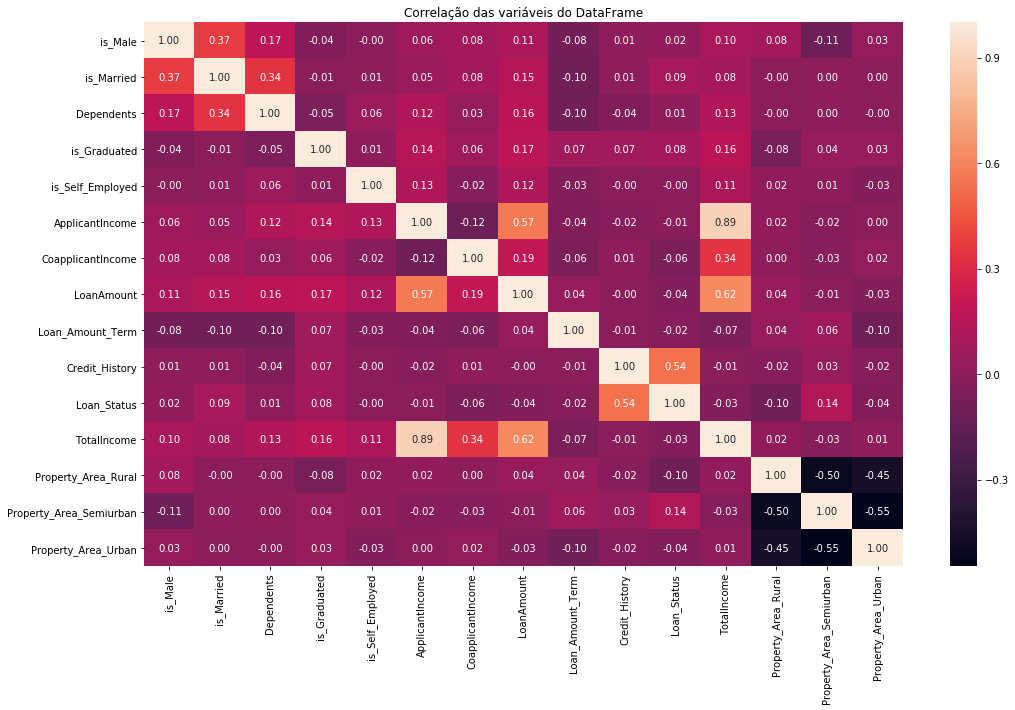

In [24]:
# Para melhorar a visualização, podemos criar um mapa de calor
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlação das variáveis do DataFrame')
plt.show()

# Treinando o modelo

In [25]:
# Normalizando coluna que possuem uma dispersão muito alta
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['TotalIncome'] = np.log(df['TotalIncome'])

## Dividindo conjuntos de treino e teste

In [26]:
# Criando variáveis com nossas features
X = df.drop('Loan_Status', axis=1)
# Criando variável com coluna que queremos prever
y = df['Loan_Status']

In [27]:
# Criando conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Testando diferentes modelos

In [28]:
# Vamos começar treinando uma Regressão Logística
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Score conjunto de treino: {0:.2%}'.format(lr.score(X_train, y_train)))
print('Score conjunto de teste: {0:.2%}'.format(lr.score(X_test, y_test)))

Score conjunto de treino: 80.44%
Score conjunto de teste: 82.18%


In [29]:
# Podemos testar também outros modelos, como uma Arvore de Decisão simples
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print('Score conjunto de treino: {0:.2%}'.format(dt.score(X_train, y_train)))
print('Score conjunto de teste: {0:.2%}'.format(dt.score(X_test, y_test)))

Score conjunto de treino: 100.00%
Score conjunto de teste: 75.74%


In [30]:
# O modelo acima gerou ovefitting em nosso treino (quando o modelo aprende muito bem o conjunto de treino, mas não é bom para entender novos casos)
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

print('Score conjunto de treino: {0:.2%}'.format(dt.score(X_train, y_train)))
print('Score conjunto de teste: {0:.2%}'.format(dt.score(X_test, y_test)))

Score conjunto de treino: 82.64%
Score conjunto de teste: 83.17%


In [31]:
# Por fim, vamos tentar uma Random Forest para ver se nosso modelo performa melhor
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print('Score conjunto de treino: {0:.2%}'.format(rf.score(X_train, y_train)))
print('Score conjunto de teste: {0:.2%}'.format(rf.score(X_test, y_test)))

Score conjunto de treino: 98.78%
Score conjunto de teste: 77.23%
